## Exploratory Data Analysis for the Residential Property Listings in the Greater Toronto Area (GTA) (Canada).

Import the required packages.

In [1]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt

Load the dataset.

In [2]:
path = os.getcwd()+"/clean_combined_toronto_property_data.xlsx"
data = pd.read_excel(path)
data.head()

,price,region,address,bedrooms,bathrooms,pricem
0,799000,"Ajax, ON","2 ROLLO DR, Ajax, Ontario",3,3,0.799000
1,989000,"Ajax, ON","717 OLD HARWOOD AVE, Ajax, Ontario",2,1,0.989000
2,999900,"Ajax, ON","52 ADDLEY CRES, Ajax, Ontario",3,4,0.999900
3,799900,"Ajax, ON","249 MONARCH AVE, Ajax, Ontario",3,3,0.799900
4,899999,"Ajax, ON","18 MONK CRES, Ajax, Ontario",3,3,0.899999


Check the missing values.

In [3]:
data.isna().sum()

price        0
region       0
address      0
bedrooms     0
bathrooms    0
pricem       0
dtype: int64

In [4]:
data.shape

(7324, 6)

In [5]:
print('The dataset has a total of', data.shape[0], 'rows and', data.shape[1], 'columns.')

The dataset has a total of 7324 rows and 6 columns.


In [6]:
data.describe()

,price,bedrooms,bathrooms,pricem
count,7.324000e+03,7324.000000,7324.000000,7324.000000
mean,1.444227e+06,3.062125,2.976106,1.444227
std,1.347525e+06,1.087886,1.401255,1.347525
min,3.590000e+05,0.000000,0.000000,0.359000
25%,7.997942e+05,2.000000,2.000000,0.799794
50%,1.099000e+06,3.000000,3.000000,1.099000
75%,1.599999e+06,4.000000,4.000000,1.599999
max,2.797500e+07,9.000000,15.000000,27.975000


Keep properties with at least one bedroom, and at least one bathroom.

In [7]:
data = data[data.bedrooms > 0]
data = data[data.bathrooms > 0]

In [8]:
data.shape

(7269, 6)

In [9]:
data["region"] = data["region"].str.replace("ON", "")
data["region"] = data["region"].str.replace(",", "")
data.head()

,price,region,address,bedrooms,bathrooms,pricem
0,799000,Ajax,"2 ROLLO DR, Ajax, Ontario",3,3,0.799000
1,989000,Ajax,"717 OLD HARWOOD AVE, Ajax, Ontario",2,1,0.989000
2,999900,Ajax,"52 ADDLEY CRES, Ajax, Ontario",3,4,0.999900
3,799900,Ajax,"249 MONARCH AVE, Ajax, Ontario",3,3,0.799900
4,899999,Ajax,"18 MONK CRES, Ajax, Ontario",3,3,0.899999


In [10]:
data.shape

(7269, 6)

In [11]:
data_region_lisitngs = (((data.groupby(by = 'region').count()).reset_index()).drop(columns= ['address', 'bedrooms', 'bathrooms', 'pricem']))
data_region_lisitngs.rename(columns= {'price' : 'count'}, inplace= True)
data_region_lisitngs = data_region_lisitngs.sort_values(by= 'count', ascending= False).reset_index().drop(columns= 'index')
data_region_lisitngs.rename(columns= {"count" : "no. of listings"}, inplace= True)

data_median = data.drop(columns= ['bedrooms', 'bathrooms', 'price'])
data_median = data_median.groupby(by= 'region').median().reset_index()
data_median.rename(columns= {"pricem" : "median price in million dollars"}, inplace= True)

pd.merge(data_median,data_region_lisitngs).sort_values(
    by = "median price in million dollars", ascending= False
).reset_index().drop(columns= "index")

,region,median price in million dollars,no. of listings
0,King,2.969000,56
1,Caledon,1.899000,132
2,Oakville,1.799450,422
3,Richmond Hill,1.698500,382
4,East Gwillimbury,1.688500,92
5,Aurora,1.688000,130
6,Whitchurch-Stouffville,1.499000,98
7,Markham,1.399450,482
8,Vaughan,1.399000,478
9,Halton Hills,1.397000,80


In [12]:
print('There are a total of', data_region_lisitngs.shape[0], 'distinct regions in the dataset.')

There are a total of 31 distinct regions in the dataset.


In [13]:
print(
    data_region_lisitngs.region[0]+", "
    +data_region_lisitngs.region[1]+", "
    +data_region_lisitngs.region[2]+", " 
    +data_region_lisitngs.region[3]+" and "
    +data_region_lisitngs.region[4]+ " are regions with one of the highest number of listings."
)

Brampton , Mississauga , Hamilton , Markham  and Vaughan  are regions with one of the highest number of listings.


Check the spread of propery prices using boxplot.

Text(0.5, 0, 'Price in Million Dollars')

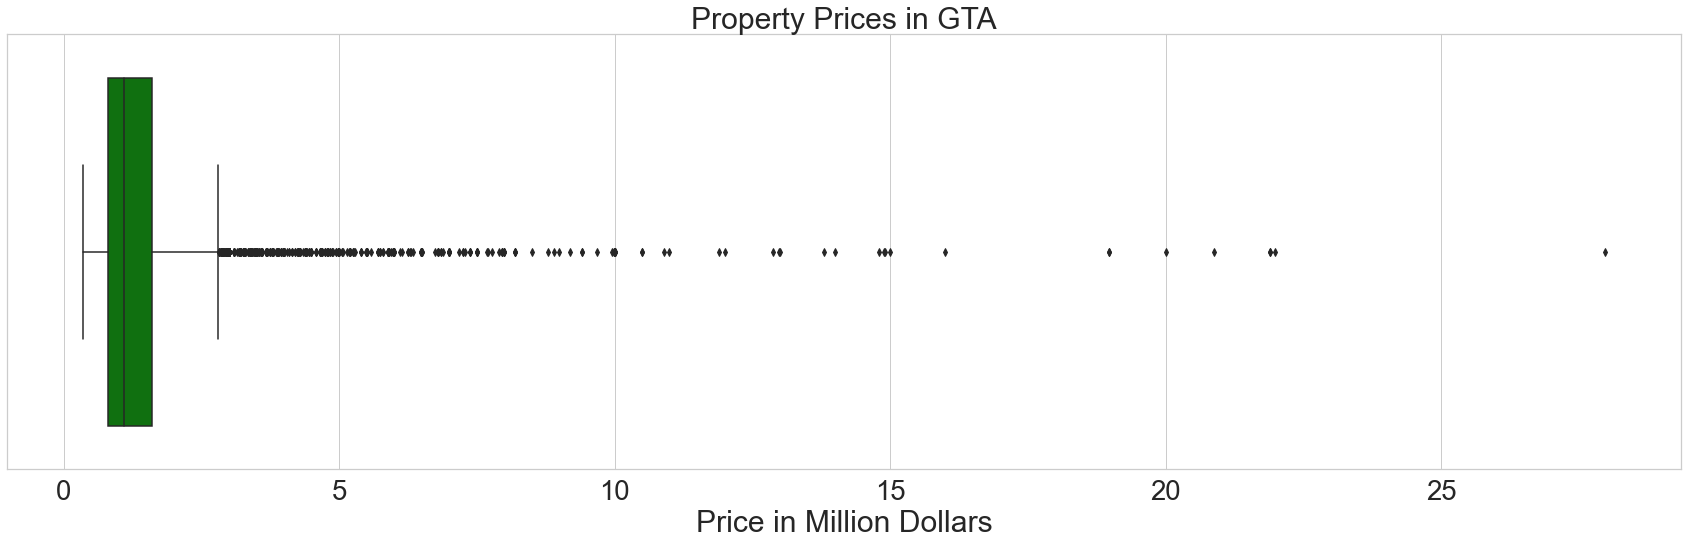

In [14]:
sns.set(font_scale=2.5)
sns.set_style("whitegrid")
plt.figure(figsize= (30,8))
sns.boxplot(x = data.pricem,  color = 'green')
plt.title("Property Prices in GTA")
plt.xlabel("Price in Million Dollars")

Check the distribution of property prices.

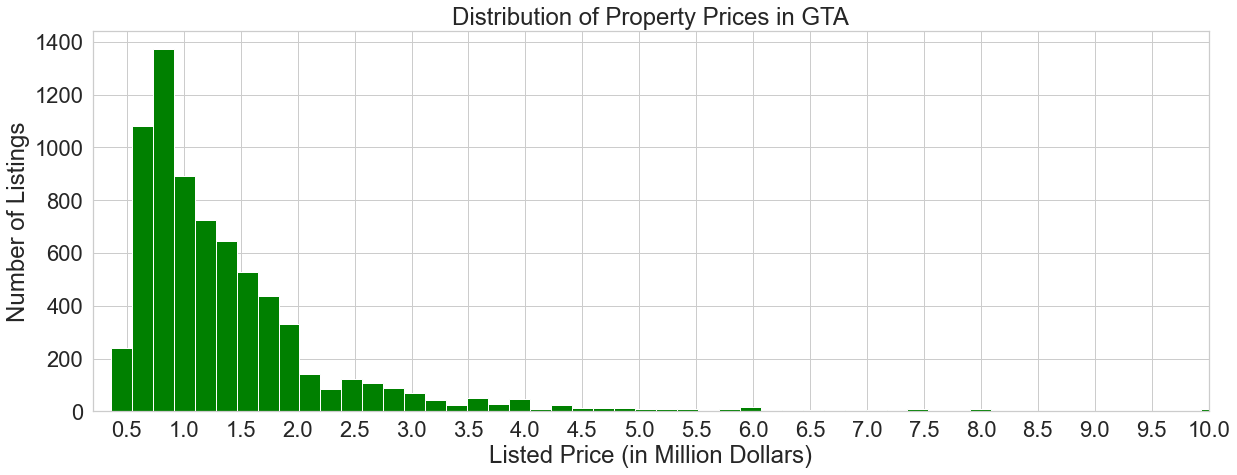

In [15]:
sns.set(font_scale= 2)
sns.set_style('whitegrid')
plt.figure(figsize= (20,7))
plt.title('Distribution of Property Prices in GTA')
sns.distplot(data.pricem, kde = False, color = 'green', hist_kws=dict(alpha=1), bins = 150)
plt.xlabel('Listed Price (in Million Dollars)')
plt.ylabel('Number of Listings')
plt.xticks(np.arange(0, 10.5, 0.5))
plt.xlim(0.2, 10);

Above figure shows that majority of the property prices in Greater Toronto region lie in a range between 0.5-2.0 million dollars.

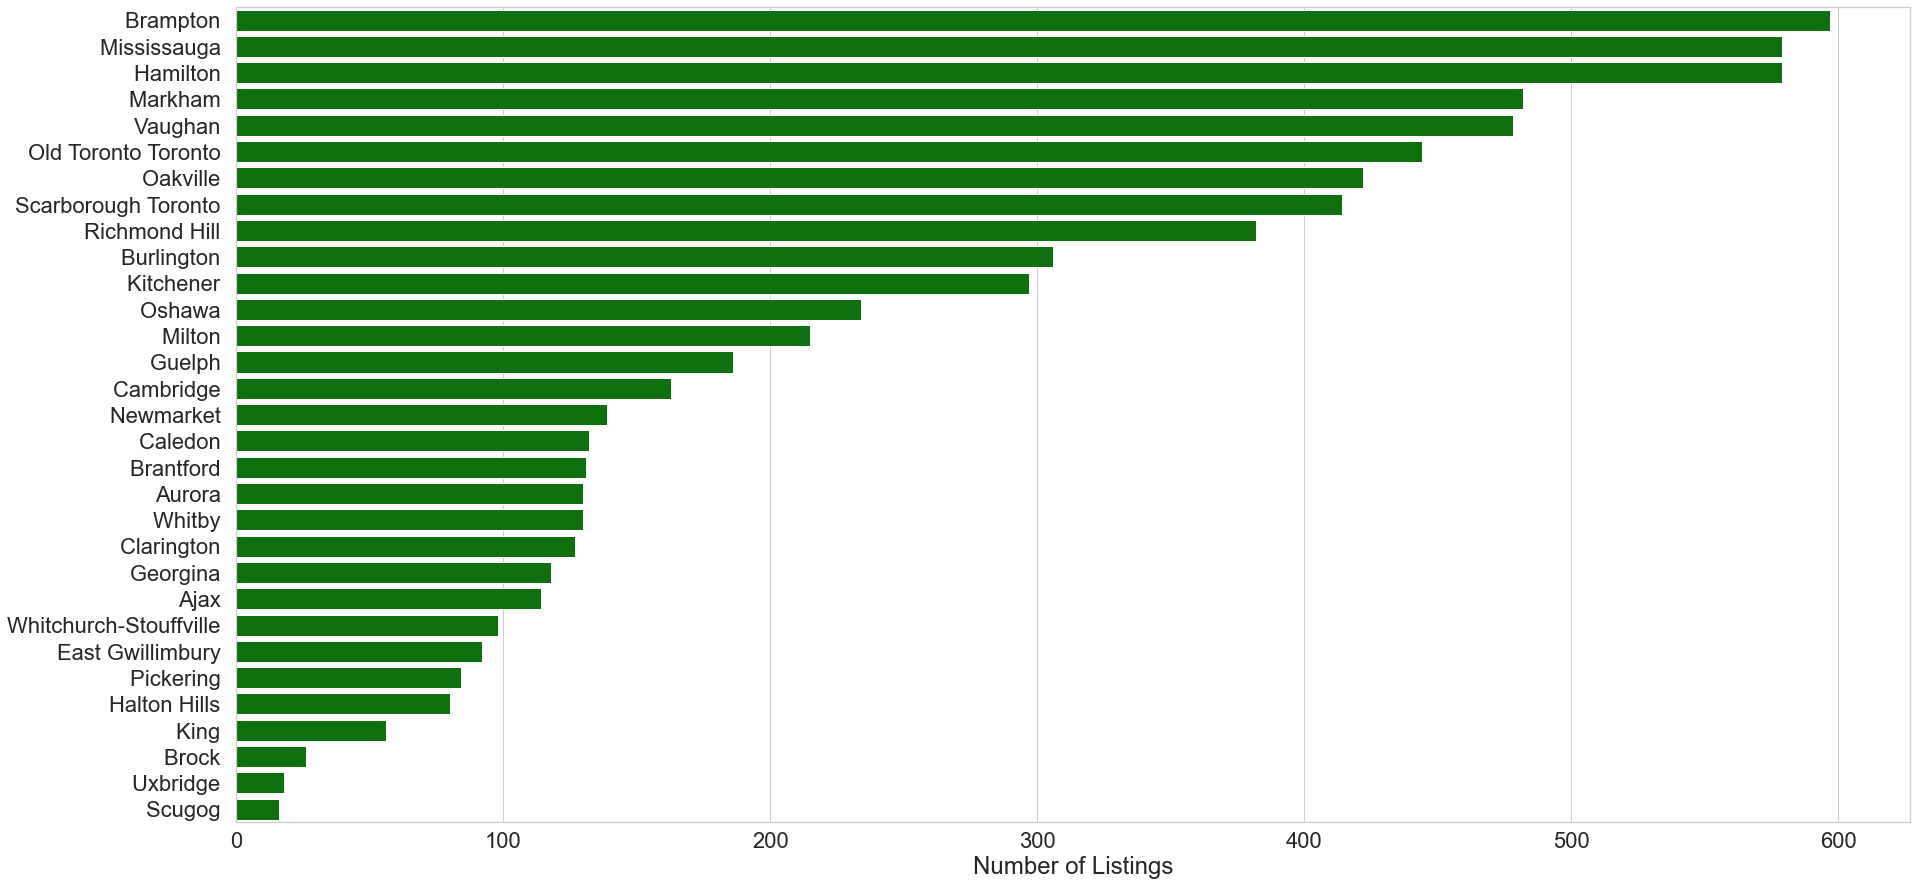

In [16]:
order = data_region_lisitngs.sort_values(by = 'no. of listings', ascending= False).region
sns.set(font_scale=2)
sns.set_style('whitegrid')
plt.figure(figsize= (30,15))
sns.barplot(data= data_region_lisitngs, y = 'region', x = 'no. of listings', order = order, color= 'green')
plt.xlabel('Number of Listings')
plt.ylabel('')
plt.xticks(np.arange(0, 650, 100));

It will be interesting to see the distribution of number of properties in terms of the number of bedrooms the property contains.

Below shown is the number of property lisitngs in the dataset for a given number of bedrooms.

In [17]:
data_gr_bedrooms = ((data.groupby(by= 'bedrooms').count())[['price']])
data_gr_bedrooms.reset_index(inplace= True)
data_gr_bedrooms.rename(columns= {'price' : 'count'}, inplace= True)
data_gr_bedrooms

,bedrooms,count
0,1,603
1,2,1205
2,3,3063
3,4,1967
4,5,331
5,6,63
6,7,17
7,8,15
8,9,5


Below shown also is the number of property lisitngs in the dataset for a given number of bathrooms.

In [18]:
data_gr_bathrooms = ((data.groupby(by= 'bathrooms').count())[['price']])
data_gr_bathrooms.reset_index(inplace= True)
data_gr_bathrooms.rename(columns= {'price' : 'count'}, inplace= True)
data_gr_bathrooms

,bathrooms,count
0,1,846
1,2,2050
2,3,1961
3,4,1664
4,5,460
5,6,174
6,7,53
7,8,29
8,9,14
9,10,4


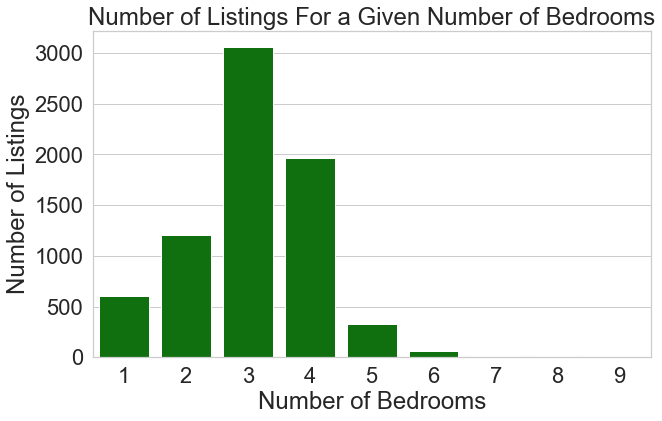

In [19]:
sns.set(font_scale=2)
sns.set_style('whitegrid')
plt.figure(figsize= (10,6))
sns.barplot(data = data_gr_bedrooms, x = 'bedrooms', y ='count', color = 'green', alpha = 1)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Listings')
plt.title('Number of Listings For a Given Number of Bedrooms');

Above barplot indicates that two, three and four bedroom properties are present the most.

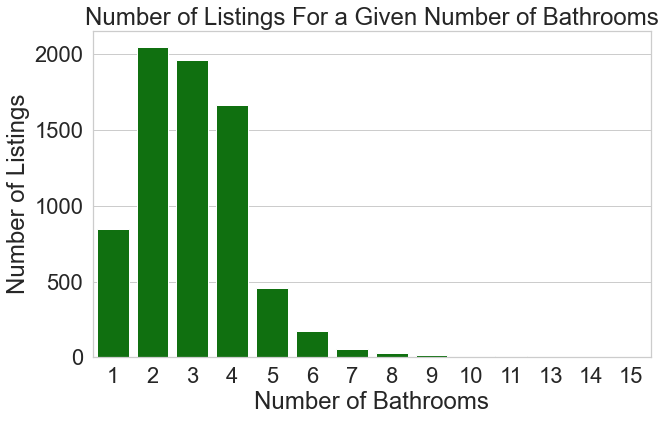

In [20]:
sns.set(font_scale=2)
sns.set_style('whitegrid')
plt.figure(figsize= (10,6))
sns.barplot(data = data_gr_bathrooms, x = 'bathrooms', y ='count', color = 'green', alpha = 1)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Listings')
plt.title('Number of Listings For a Given Number of Bathrooms');

Above barplot indicates that one, two, three and four bathroom properties are present the most.

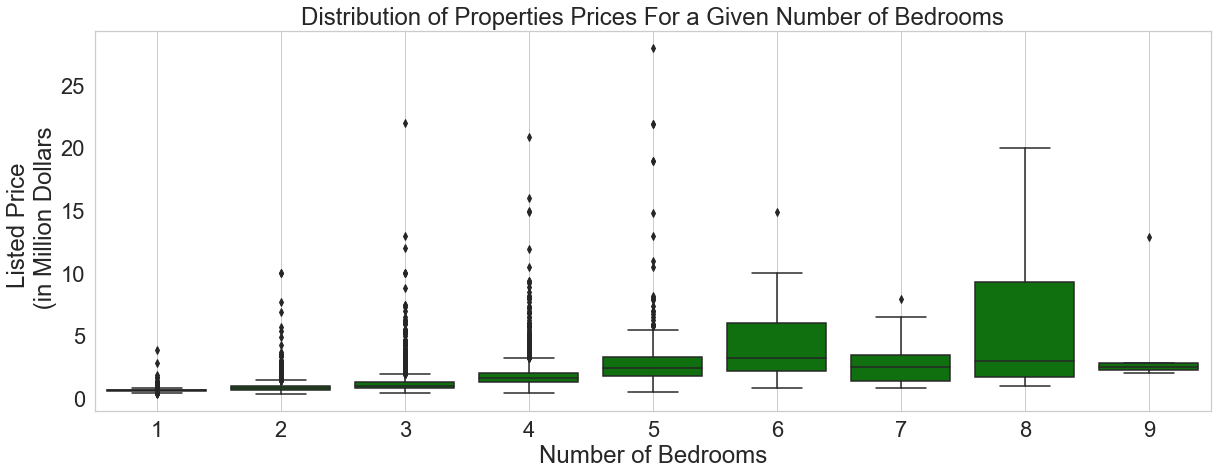

In [21]:
sns.set(font_scale= 2)
sns.set_style('whitegrid')
plt.figure(figsize= (20,7))
sns.boxplot(y = data.pricem, x = data.bedrooms, color = 'green', boxprops=dict(alpha=1))
plt.grid()
plt.xlabel('Number of Bedrooms')
plt.ylabel('Listed Price \n (in Million Dollars')
plt.title('Distribution of Properties Prices For a Given Number of Bedrooms');

Below we show the same boxlplot, but with reduced scale of the y-axis.

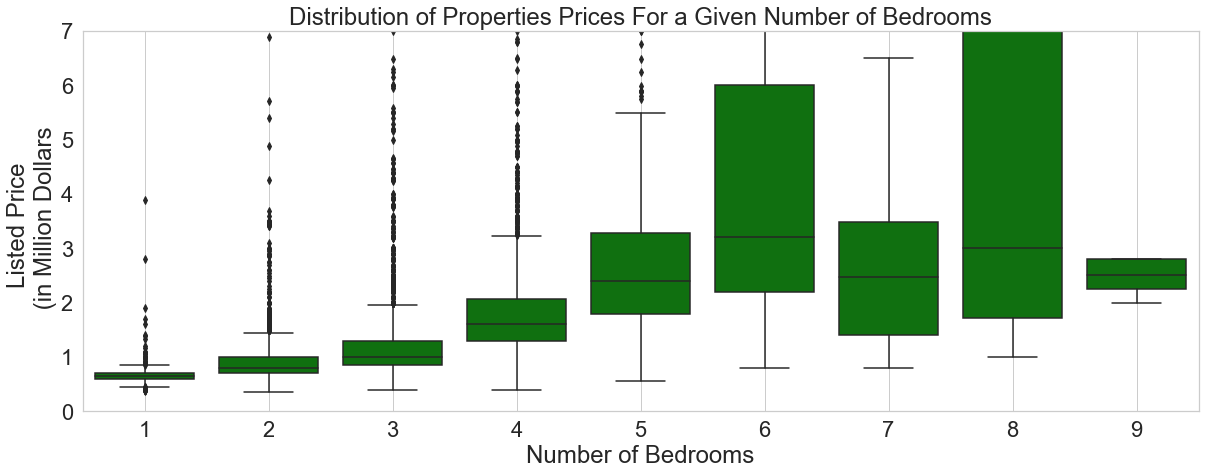

In [22]:
sns.set(font_scale= 2)
sns.set_style('whitegrid')
plt.figure(figsize= (20,7))
sns.boxplot(y = data.pricem, x = data.bedrooms, color = 'green', boxprops=dict(alpha=1))
plt.grid()
plt.xlabel('Number of Bedrooms')
plt.ylabel('Listed Price \n (in Million Dollars')
plt.ylim(0,7)
plt.title('Distribution of Properties Prices For a Given Number of Bedrooms');

The median price, indicated by the horizontal line in the box increases with the increase in the number of bedrooms a property contains.

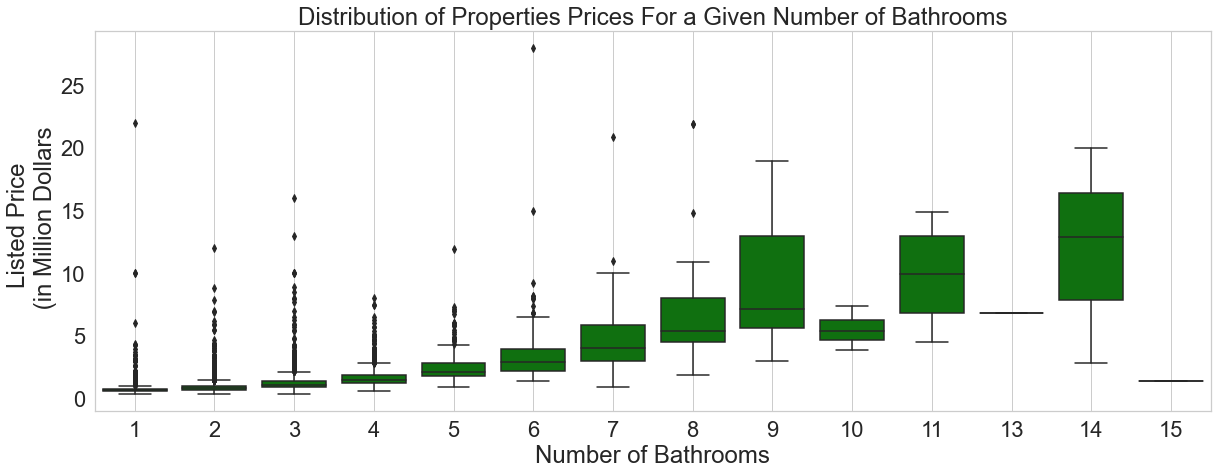

In [23]:
sns.set(font_scale= 2)
sns.set_style('whitegrid')
plt.figure(figsize= (20,7))
sns.boxplot(y = data.pricem, x = data.bathrooms, color = 'green', boxprops=dict(alpha=1))
plt.grid()
plt.xlabel('Number of Bathrooms')
plt.ylabel('Listed Price \n (in Million Dollars')
plt.title('Distribution of Properties Prices For a Given Number of Bathrooms');

The median price also increases with the increase in the number of bathrroms a property contains.

Check the variation in the listed property prices in different regions of GTA.

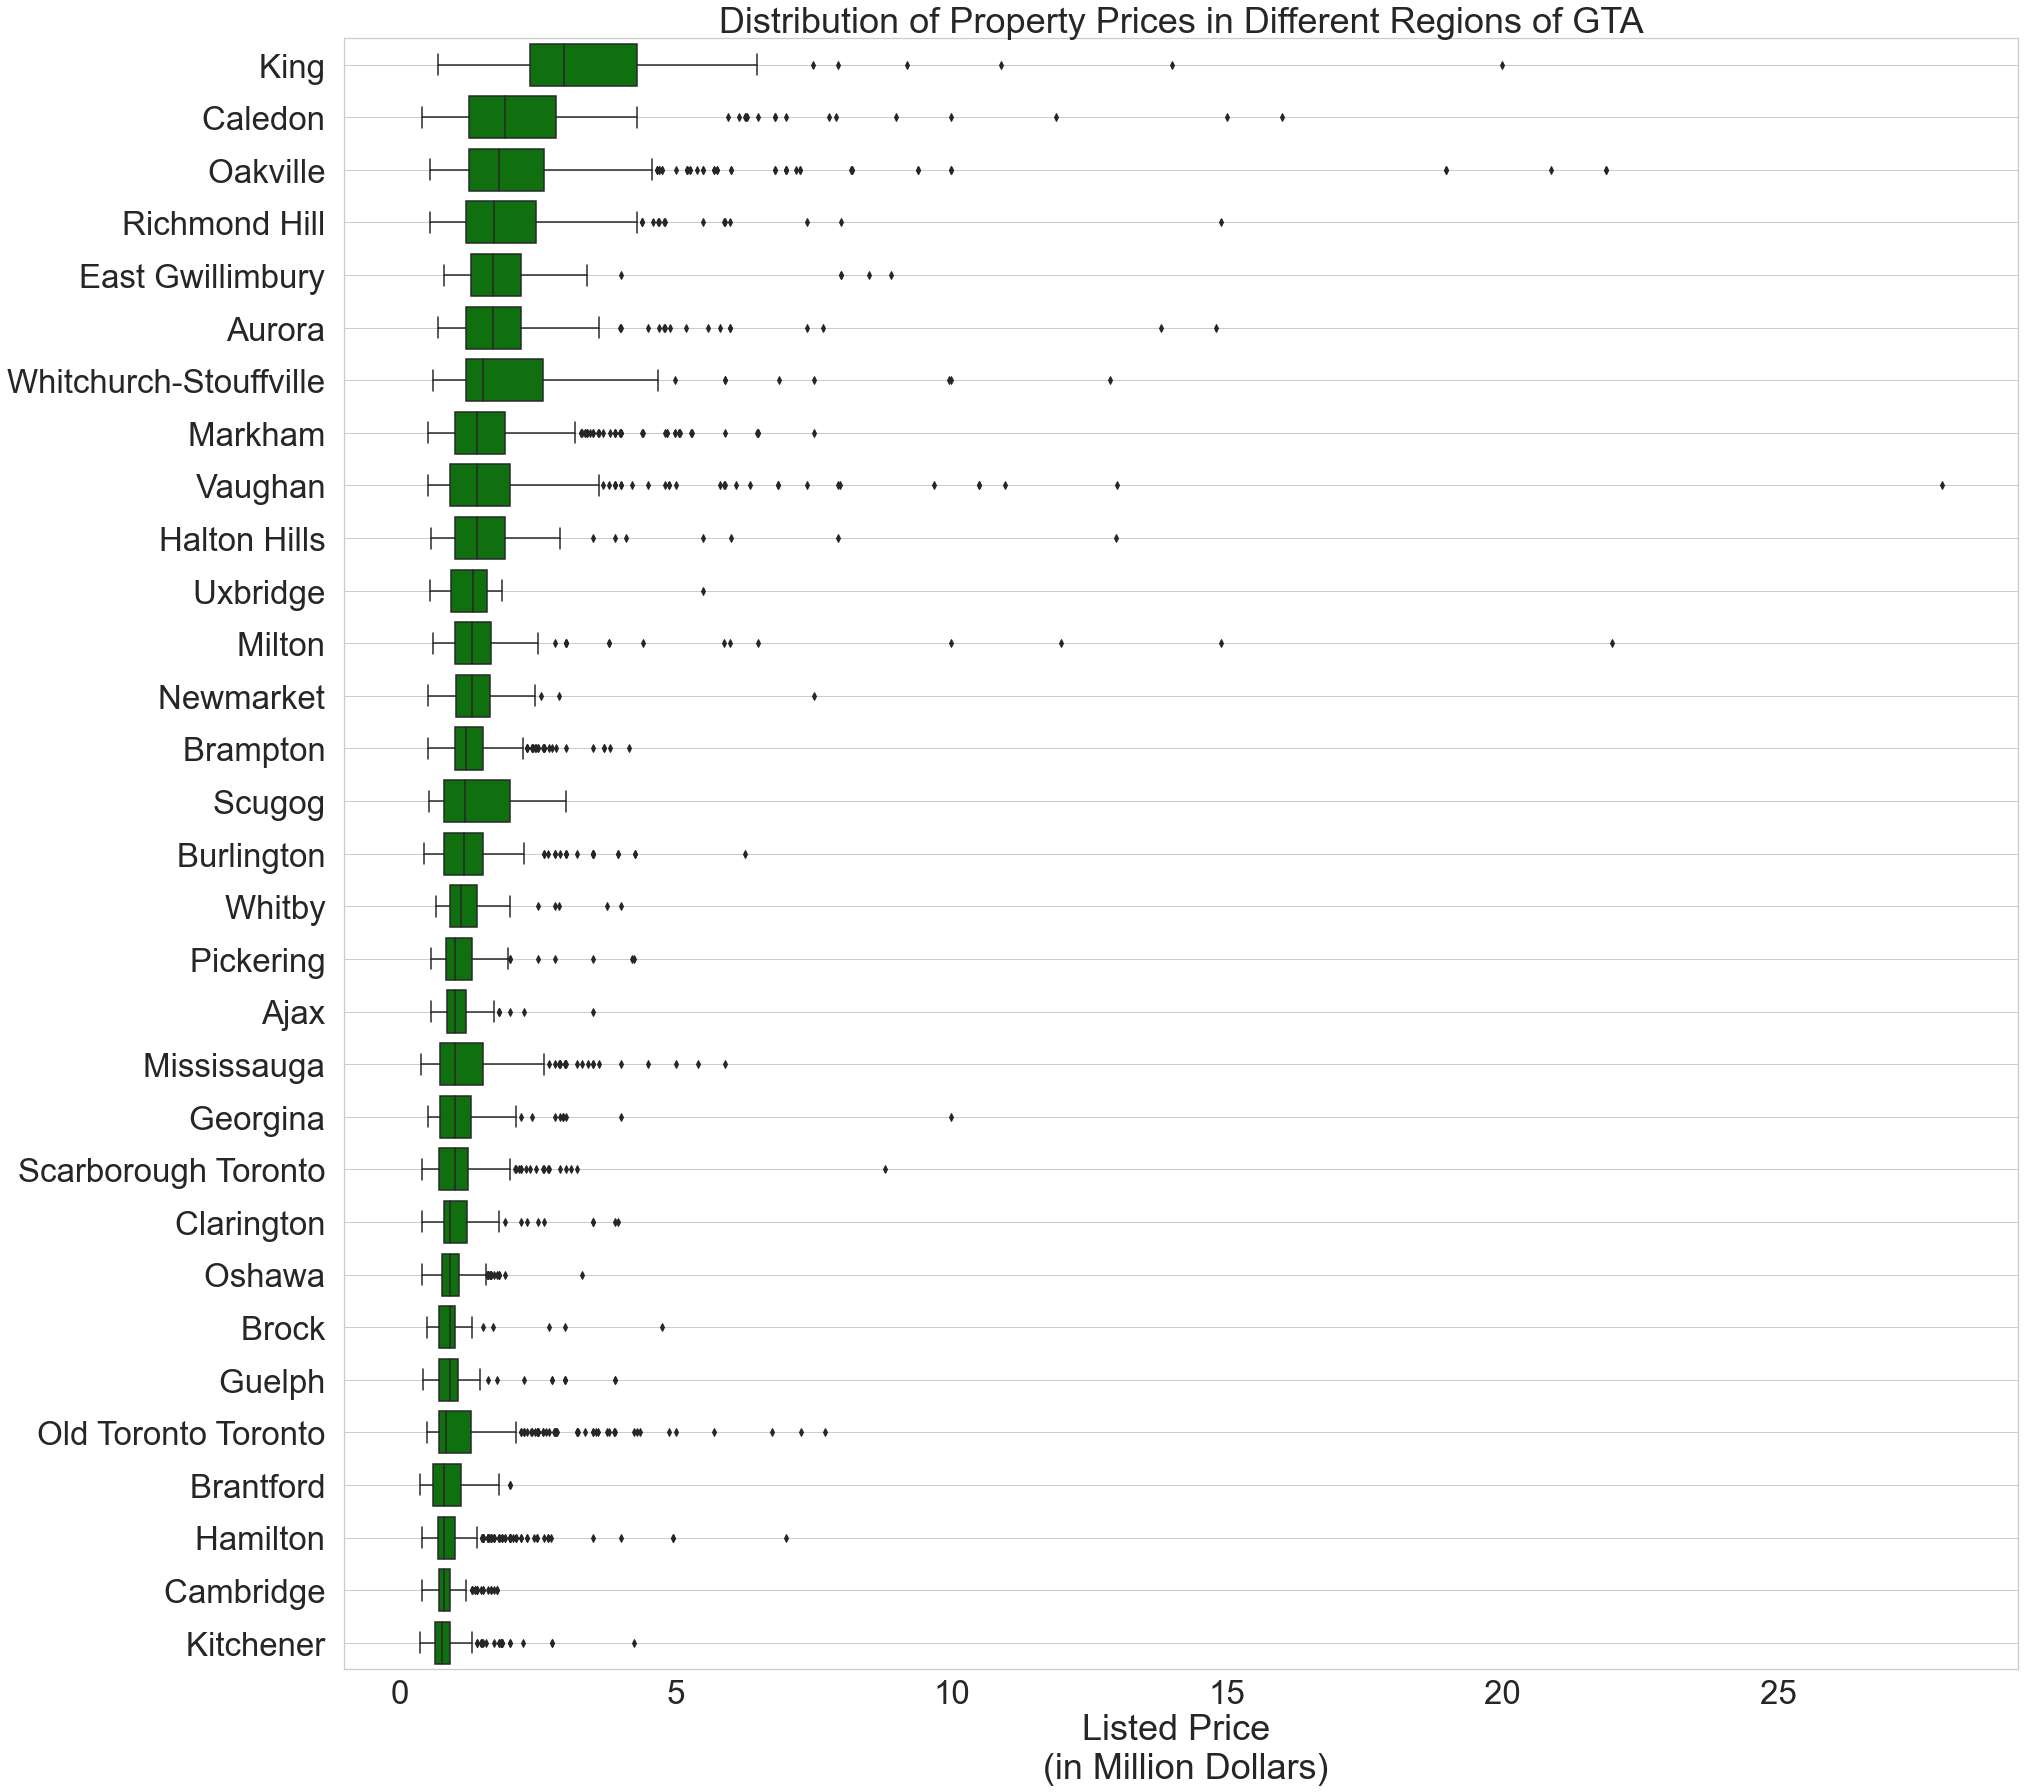

In [24]:
sns.set(font_scale = 3)
sns.set_style('whitegrid')
plt.figure(figsize= (30,30))
order = data.groupby(["region"])["price"].median().sort_values(ascending= False).index
sns.boxplot(x = data.pricem, y = data.region ,color = 'green', order = order, boxprops=dict(alpha=1))
plt.grid()
plt.xlabel('Listed Price \n (in Million Dollars)')
plt.ylabel('')
plt.title('Distribution of Property Prices in Different Regions of GTA');

The exploratory data analysis shows that the number of bedrooms and number of bathrooms a property contains, as well as the region where a property is located are important factors in determinig the listed price of the property.

**Author:**

**Mangaljit Singh**